In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edward as ed
import tensorflow as tf
plt.rcParams['figure.figsize'] = (32.0, 24.0)
plt.rcParams['font.size'] = 24

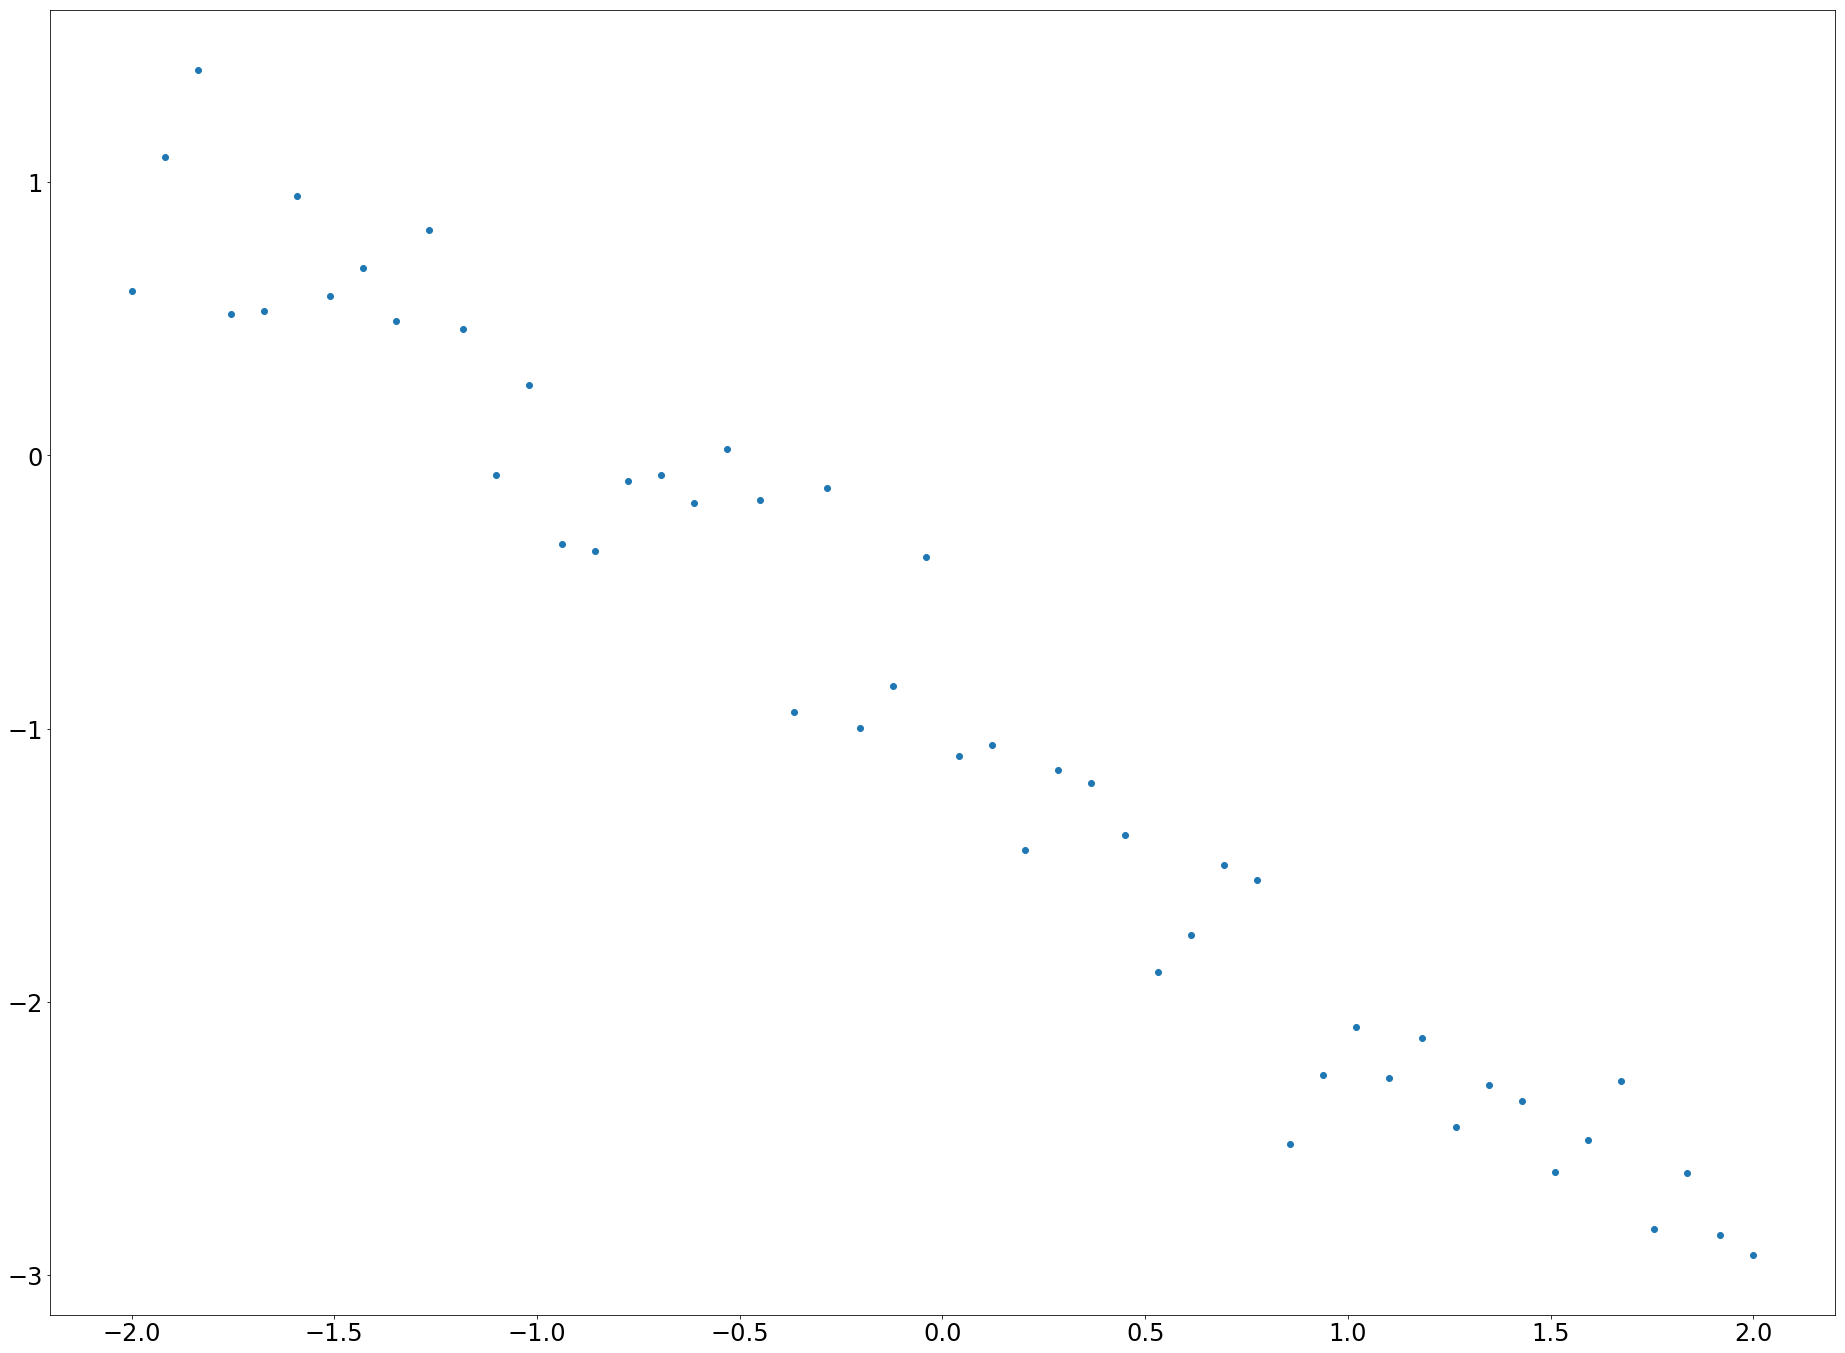

In [4]:
def make_dataset(N, w, noise_std=0.3):
    D = len(w)
    x = np.linspace(-2, 2, N)
    bias = np.ones((N, D))
    bias[:,0] = x
    y = np.dot(bias, w) + np.random.normal(0, noise_std, size=N)
    return x, y

N = 50

w_true = np.random.randn(2)
x_train, y_train = make_dataset(N, w_true)
x_test, y_test = make_dataset(N, w_true)

plt.scatter(x_train, y_train)
plt.show()

In [6]:
from edward.models import Normal

X = tf.placeholder(tf.float32, [N, 2])
w = Normal(loc=tf.zeros(2), scale=tf.ones(2))
y = Normal(loc=ed.dot(X, w), scale=tf.ones(N))

X_train = np.ones((N, 2))
X_train[:,0] = x_train

In [7]:
qw = Normal(loc=tf.Variable(tf.random_normal([2])), scale=tf.nn.softplus(tf.Variable(tf.random_normal([2]))))
inference = ed.KLqp({w: qw}, data={X: X_train, y: y_train})
inference.run(n_samples=5, n_iter=250)

250/250 [100%] ██████████████████████████████ Elapsed: 2s | Loss: 52.2440


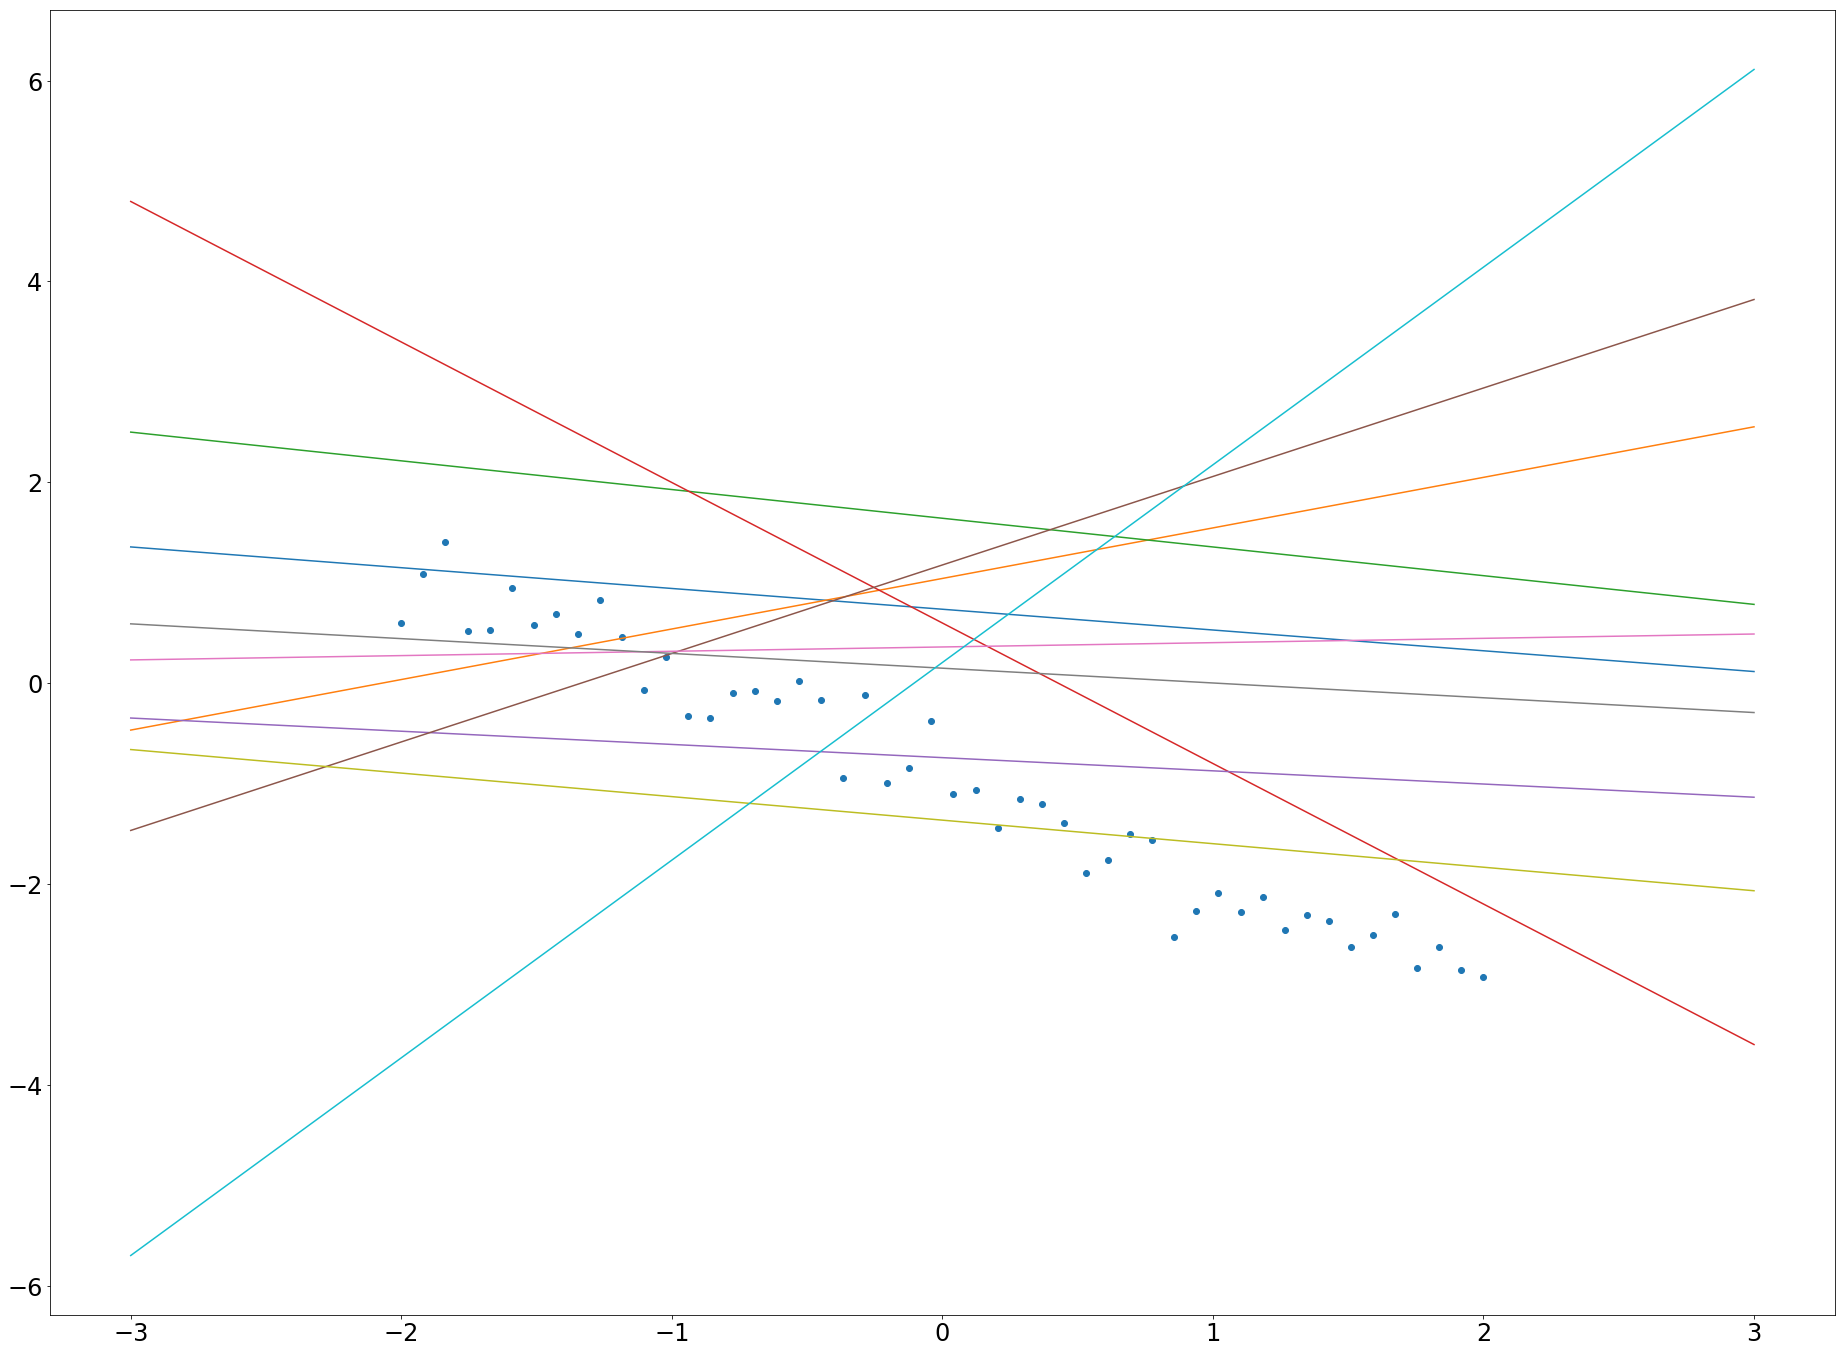

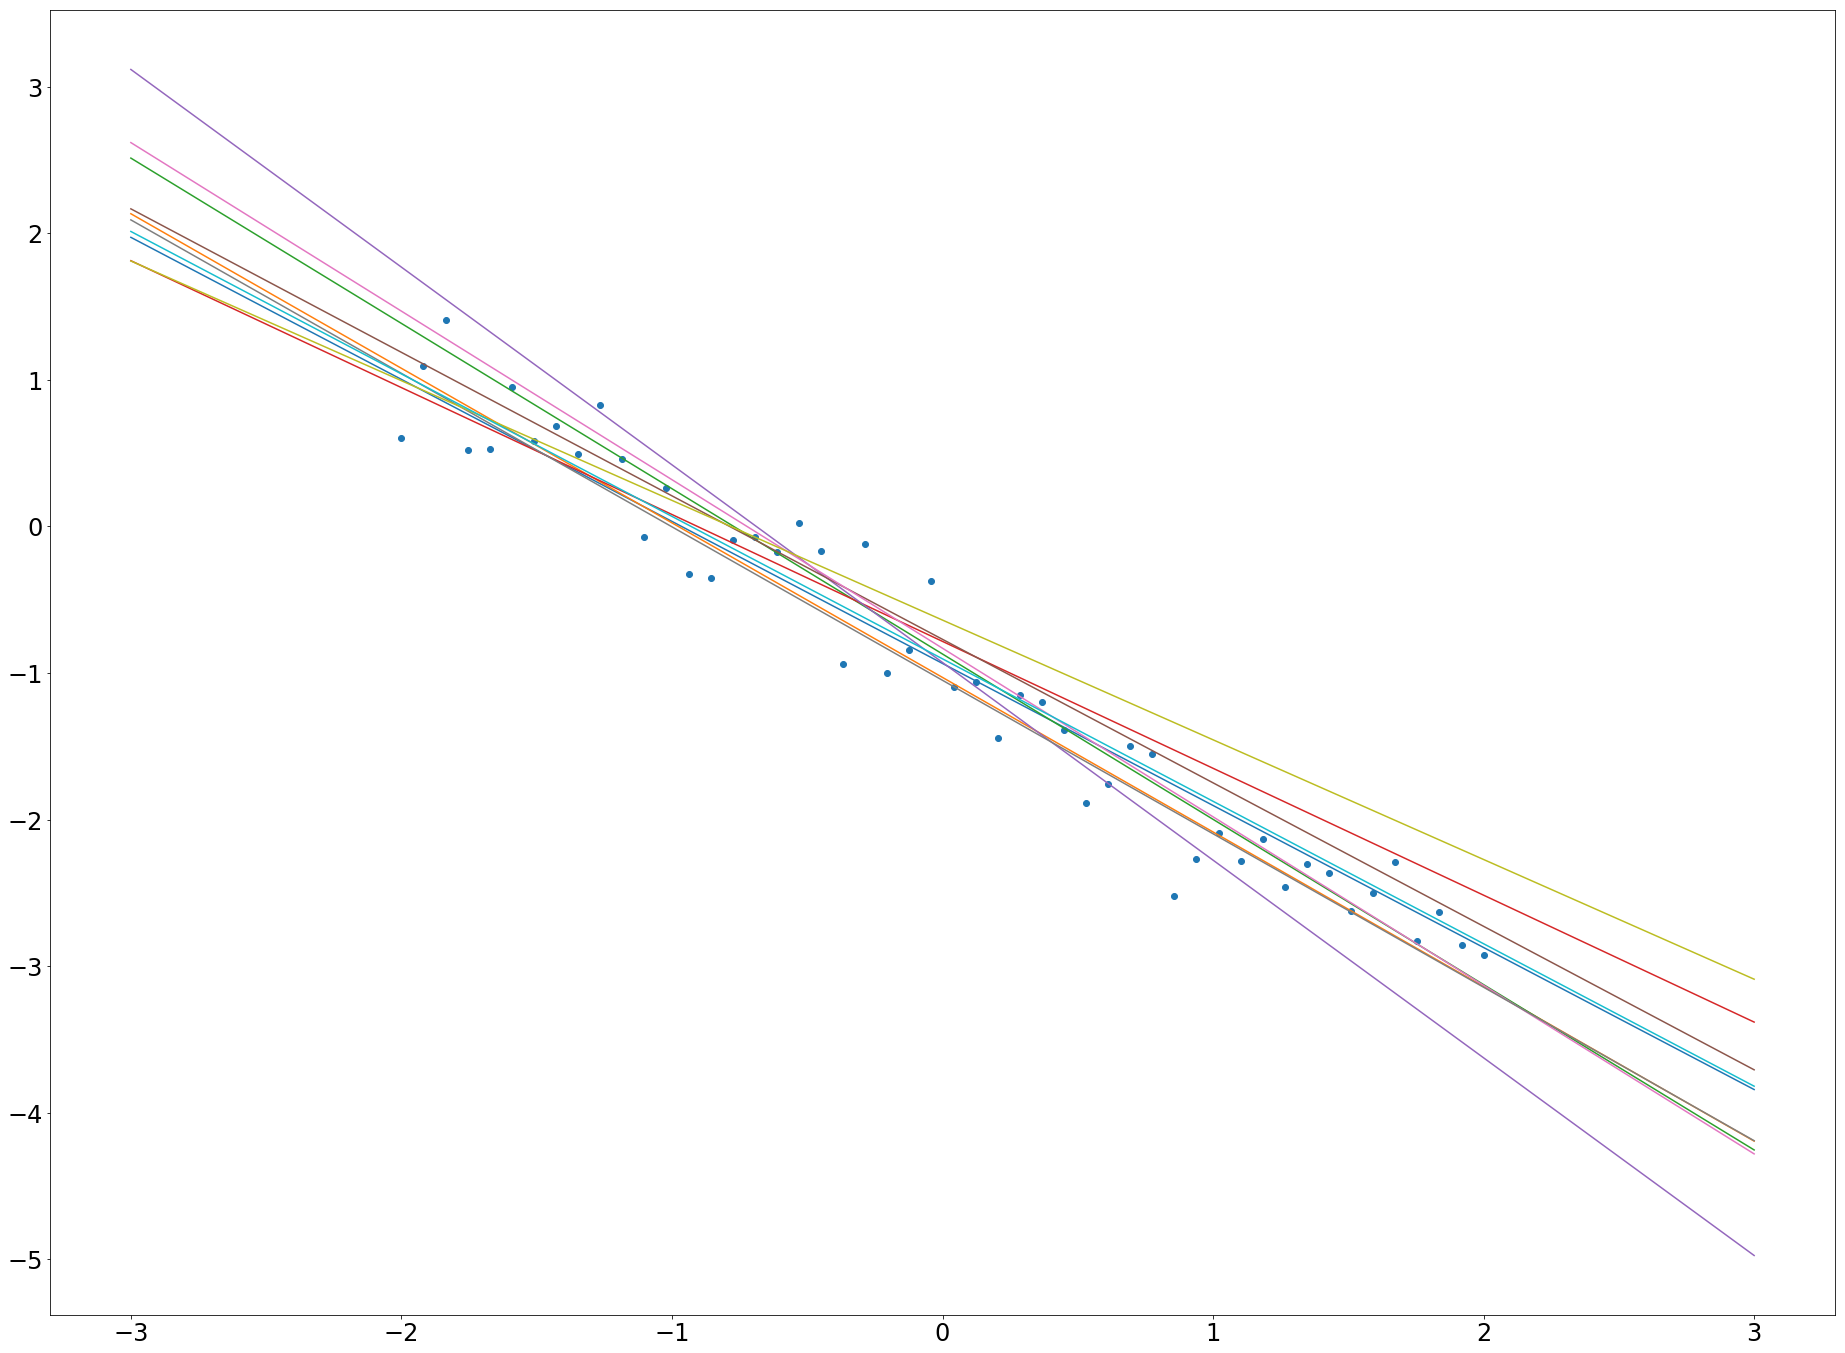

In [17]:
def visualise(X_data, y_data, w, n_samples=10):
    w_samples = w.sample(n_samples).eval()
    plt.scatter(X_data, y_data)
    inputs = np.linspace(-3, 3, num=100)
    bias = np.ones((100, 2))
    bias[:,0] = inputs
    for ns in range(n_samples):
        output = np.dot(bias, w_samples[ns])
        plt.plot(inputs, output)

visualise(x_train, y_train, w)
plt.show()
        
visualise(x_train, y_train, qw)
plt.show()